# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)

In [1]:
# sample code for Problem 2
import numpy as np
from math import sqrt

obj = lambda x1, x2: (2-2*x1-3*x2)**2+x1**2+(x2-1)**2  # note that this is 1D. In Prob 2 it should be 2D.
grad2 = lambda x1, x2: 10*x1-8+12*x2 # this is not the correct gradient!
grad3 =  lambda x1, x2: 20*x2-14+12*x1
eps = 1e-3  # termination criterion
x01 = 0  # initial guess 
x02 = 0
x03 = 0
k = 0  # counter
soln1 = [x01]# use an array to store the search steps
soln2 = [x02]
soln3 = [x03]
k1=0
k2=0
k3=0
x1 = soln1[k1]  # start with the initial guess
x2 = soln2[k2]
x3 = soln3[k3]

error = sqrt((grad2(x1,x2))**2+(grad3(x1,x2))**2)  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value
# a = 0.01  # set a fixed step size to start with

# Armijo line search
def line_search(x1,x2):
    a = 1.  # initialize step size
    phi2 = lambda a, x1, x2: obj(x1, x2) - a*0.8*grad2(x1,x2)**2  # define phi as a search criterion
    phi3 = lambda a, x1, x2: obj(x1, x2) - a*0.8*grad2(x1,x2)**2
    while phi2(a,x1,x2)<obj(x1-a*grad2(x1,x2),x2-a*grad3(x1,x2)) and phi3(a,x1,x2)<obj(x1-a*grad2(x1,x2),x2-a*grad3(x1,x2)):
        a = 0.5*a
    return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    a = line_search(x1,x2)
    x0 = 1-2*x1-3*x2
    x1 = x1 - a*grad2(x1,x2)
    x2 = x2 - a*grad3(x1,x2)
    soln1.append(x0)
    soln2.append(x1)
    soln3.append(x2)
    error = sqrt((grad2(x1,x2))**2+(grad3(x1,x2))**2)
    
soln1  # print the search trajectory



[0,
 1,
 -0.53125,
 -1.283203125,
 -1.161346435546875,
 -1.1250128746032715,
 -1.1695948541164398,
 -1.1357807029271498,
 -1.110110163115678,
 -1.1428686062059796,
 -1.118258681566688,
 -1.0995712905247554,
 -1.1233934571287931,
 -1.1054924385792795,
 -1.091899497498177,
 -1.1092278825523731,
 -1.096206662626928,
 -1.086319141204821,
 -1.0989238197081543,
 -1.0894521742307384,
 -1.082259983507574,
 -1.0914286365702832,
 -1.08453895422851,
 -1.0793073490604406,
 -1.085976634479668,
 -1.080965074147247,
 -1.0771596004498394,
 -1.0820108438882052,
 -1.0783654309765822,
 -1.0755973264280596,
 -1.0791261247053614,
 -1.0764744484978024,
 -1.0744609270808048,
 -1.0770277777120074,
 -1.0750989463614313,
 -1.0736343093054095,
 -1.0755014384652963,
 -1.0740984050299318,
 -1.0730330268880546,
 -1.0743911781015767,
 -1.0733706104816223,
 -1.072595653586654,
 -1.0735835738432813,
 -1.0728412121570625,
 -1.072277507904598,
 -1.072996121873159,
 -1.0724561274010718,
 -1.0720460884862495,
 -1.07256880

In [2]:
soln2

[0,
 0.25,
 0.3359375,
 0.279541015625,
 0.24190139770507812,
 0.1804105043411255,
 0.16417299769818783,
 0.13693959747615736,
 0.09229460701271819,
 0.08048111265569702,
 0.06066870791887996,
 0.02819229679783114,
 0.01959919645234935,
 0.005187691851667606,
 -0.01843564400433513,
 -0.02468627278872297,
 -0.035169213567793775,
 -0.05235284717302478,
 -0.0568995594306274,
 -0.06452485874505547,
 -0.077024247278817,
 -0.08033152933699668,
 -0.08587817803199817,
 -0.09497024304310854,
 -0.09737596260299065,
 -0.10141059920870961,
 -0.10802417442008079,
 -0.10977409671246609,
 -0.11270889454000972,
 -0.11751961432952347,
 -0.11879250917581095,
 -0.12092728341454805,
 -0.12442660475793076,
 -0.12535250946624588,
 -0.12690534591978442,
 -0.12945075500616376,
 -0.13012425881630216,
 -0.13125379326902478,
 -0.13310532583241033,
 -0.13359523303149604,
 -0.13441685727723032,
 -0.13576366351424,
 -0.13612002239462506,
 -0.13671767251459382,
 -0.13769734042641907,
 -0.1379565561551659,
 -0.138391

In [3]:
soln3

[0,
 0.34375,
 0.537109375,
 0.534088134765625,
 0.5470700263977051,
 0.6029246151447296,
 0.6024782358435914,
 0.6120769893877878,
 0.6527597973935144,
 0.652432152085098,
 0.6594112915623318,
 0.6890029545110437,
 0.688764681891527,
 0.6938413712649473,
 0.7153663901870145,
 0.715193069401458,
 0.7188858561134694,
 0.7345431713514012,
 0.734417097697331,
 0.7371032336658949,
 0.748492377042639,
 0.7484006709675012,
 0.7503545683748123,
 0.7586390401886284,
 0.7585723331177427,
 0.7599935996224196,
 0.7660197309094556,
 0.7659712081338381,
 0.767005038502693,
 0.7713884511214695,
 0.7713531556164748,
 0.7721051646366336,
 0.7752936624092897,
 0.7752679884313077,
 0.7758150003816595,
 0.7781343161592079,
 0.7781156408875121,
 0.7785135378087014,
 0.7802006099221324,
 0.7801870255148715,
 0.7804764560470382,
 0.7817036336239205,
 0.7816937523154375,
 0.7819042843112618,
 0.7827969342419989,
 0.7827897465704678,
 0.7829428877091512,
 0.783592201968029,
 0.7835869736501269,
 0.78369836863

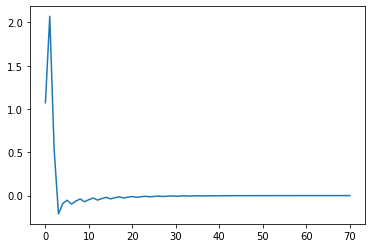

In [4]:
import matplotlib.pyplot as plt

x= np.subtract(soln1, -1.0715091084573323)

plt.plot(x)

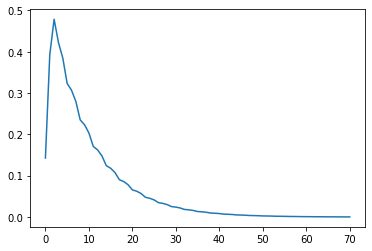

In [5]:
y= np.subtract(soln2, -0.1425071213056026)

plt.plot(y)

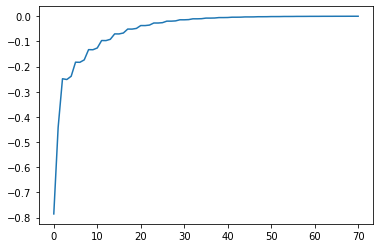

In [6]:
z= np.subtract(soln3, 0.7854970711130171)

plt.plot(z)

In [7]:
# sample code for Problem 2
import numpy as np
from math import sqrt

obj1 = lambda x11, x22: (2-2*x11-3*x22)**2+x11**2+(x22-1)**2  # note that this is 1D. In Prob 2 it should be 2D.
grad22 = lambda x11, x22: 10*x11-8+12*x22 # this is not the correct gradient!
grad33 =  lambda x11, x22: 20*x22-14+12*x11
eps1 = 1e-3  # termination criterion
x011 = 0  # initial guess 
x022 = 0
x033 = 0
k1 = 0  # counter
soln11 = [x011]# use an array to store the search steps
soln22 = [x022]
soln33 = [x033]
k11=0
k22=0
k33=0
x11 = soln11[k11]  # start with the initial guess
x22 = soln22[k22]
x33 = soln33[k33]

error1 = sqrt((grad22(x11,x22))**2+(grad33(x11,x22))**2)  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value
# a = 0.01  # set a fixed step size to start with


while error1 >= eps1:  # keep searching while gradient norm is larger than eps
    aa =1
    x00 = 1-2*x11-3*x22
    x11 = x11 - aa*(grad22(x11,x22)/10)
    x22 = x22 - aa*(grad33(x11,x22)/20)
    soln11.append(x00)
    soln22.append(x11)
    soln33.append(x22)
    error1 = sqrt((grad22(x11,x22))**2+(grad33(x11,x22))**2)
    
soln11  # print the search trajectory


[0,
 1,
 -1.2599999999999998,
 -1.2071999999999998,
 -1.169184,
 -1.1418124799999996,
 -1.1221049856,
 -1.107915589632,
 -1.0976992245350399,
 -1.0903434416652287,
 -1.0850472779989646,
 -1.0812340401592544,
 -1.0784885089146636,
 -1.076511726418558,
 -1.0750884430213616,
 -1.0740636789753806,
 -1.073325848862274,
 -1.0727946111808373,
 -1.0724121200502024,
 -1.0721367264361459,
 -1.0719384430340253,
 -1.071795678984498,
 -1.0716928888688386,
 -1.0716188799855642,
 -1.071565593589606,
 -1.0715272273845162]

In [8]:
soln22

[0,
 0.8,
 0.5360000000000001,
 0.3459200000000002,
 0.20906240000000015,
 0.11052492800000022,
 0.039577948160000154,
 -0.01150387732479994,
 -0.04828279167385594,
 -0.07476361000517626,
 -0.09382979920372689,
 -0.10755745542668331,
 -0.11744136790721209,
 -0.12455778489319284,
 -0.12968160512309893,
 -0.13337075568863138,
 -0.13602694409581473,
 -0.13793939974898672,
 -0.13931636781927034,
 -0.14030778482987466,
 -0.14102160507750983,
 -0.14153555565580708,
 -0.14190560007218114,
 -0.14217203205197057,
 -0.1423638630774189,
 -0.14250198141574164]

In [9]:
soln33

[0,
 0.21999999999999992,
 0.37839999999999985,
 0.4924479999999999,
 0.5745625599999998,
 0.6336850431999999,
 0.6762532311039999,
 0.7069023263948799,
 0.7289696750043135,
 0.7448581660031057,
 0.7562978795222361,
 0.76453447325601,
 0.7704648207443273,
 0.7747346709359157,
 0.7778089630738594,
 0.7800224534131789,
 0.7816161664574889,
 0.782763639849392,
 0.7835898206915621,
 0.7841846708979249,
 0.7846129630465059,
 0.7849213333934842,
 0.7851433600433088,
 0.7853032192311824,
 0.7854183178464513,
 0.785501188849445]

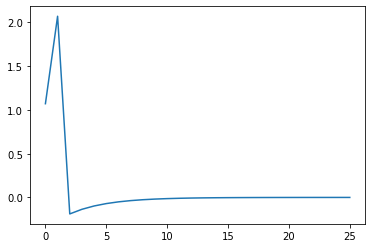

In [10]:
xx= np.subtract(soln11,-1.0715272273845162)

plt.plot(xx)

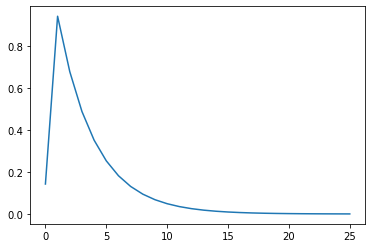

In [11]:
yy= np.subtract(soln22, -0.14250198141574164)

plt.plot(yy)

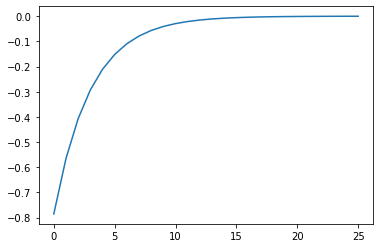

In [12]:
zz= np.subtract(soln33, 0.785501188849445)

plt.plot(zz)

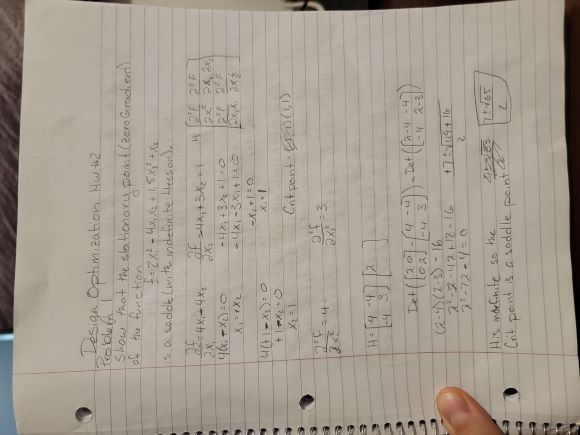

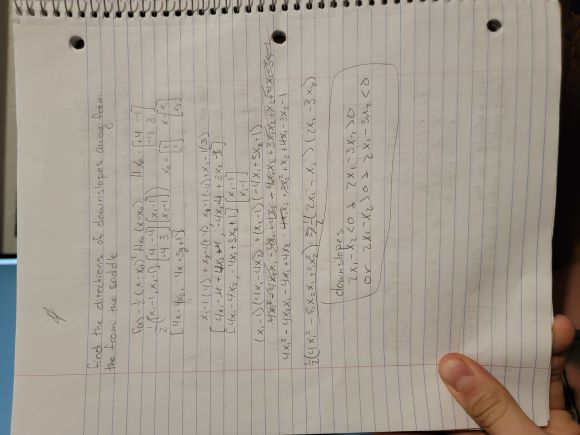

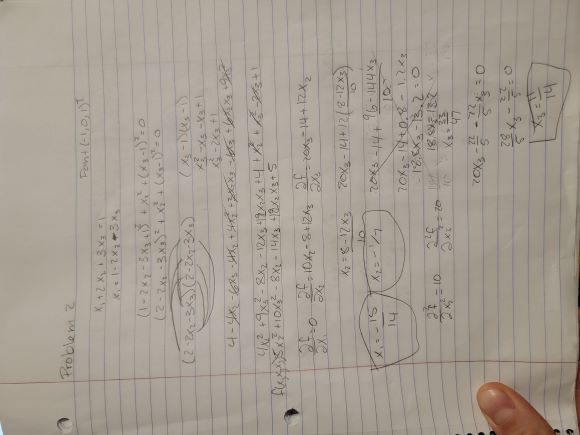

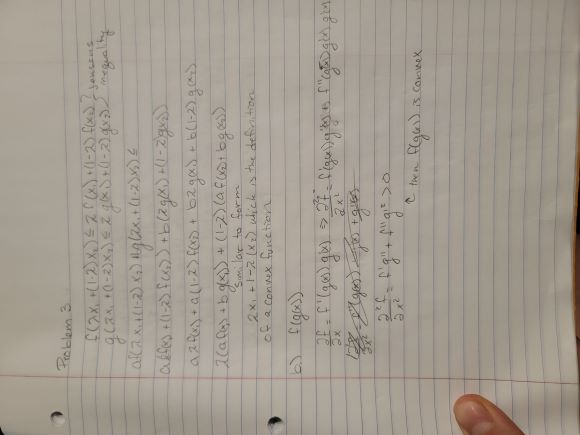

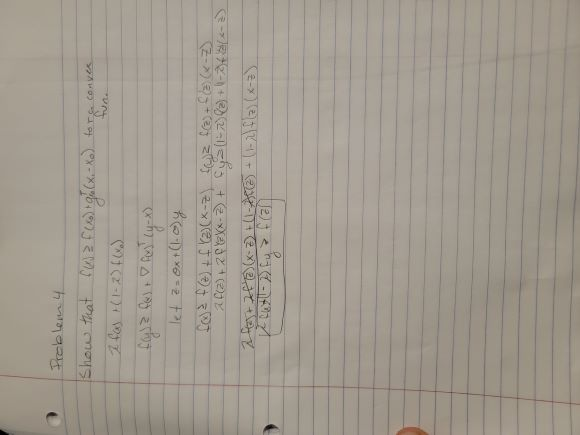